In [1]:
from tools import compute_sprague_grundy, find_pre_and_period_length
from tools_faster import compute_sprague_grundy as compute_sprague_grundy_fast, find_period_fast, parallel_period_computation
import numpy as np
from copy import copy
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
def period_to_colour(s, period):
    if period == s[0] + s[1]:
        return "red"
    if period == s[1] + s[2]:
        return "blue"
    if period == s[2] + s[3]:
        return "green"
    if period == s[3] + s[0]:
        return "yellow"
    if period == s[0] + s[2]:
        return "purple"
    if period == s[1] + s[3]:
        return "cyan"
    if period == s[0] + s[3]:
        return "magenta"
    if period == s[0] + s[1] + s[2]:
        return "orange"
    if period == s[0] + s[1] + s[3]:
        return "brown"
    if period == s[0] + s[2] + s[3]:
        return "pink"
    if period == s[1] + s[2] + s[3]:
        return "silver"
    if period == s[0] + s[1] + s[2] + s[3]:
        return "black"
    return "white"

In [3]:
compute_sprague_grundy_fast({1,2}, 5)#just to compile

[0, 1, 2, 0, 1, 2]

In [4]:
S = {7,17}
max_n = 10000

Computing periods: 100%|██████████| 4656/4656 [00:00<00:00, 5264.19it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


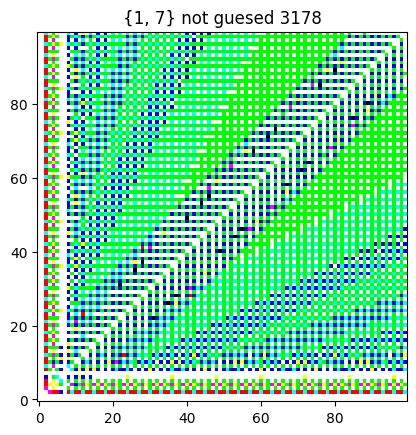

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 2310.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


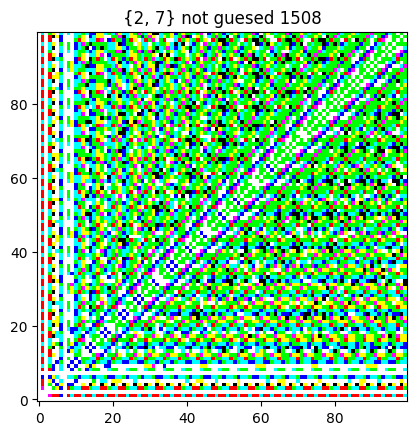

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 2061.73it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


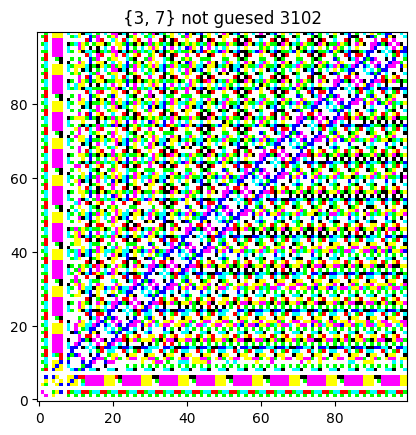

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2988.22it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


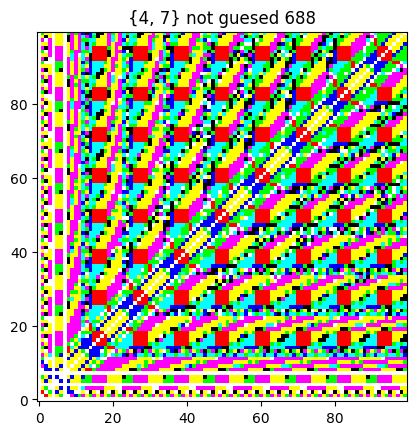

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2479.15it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


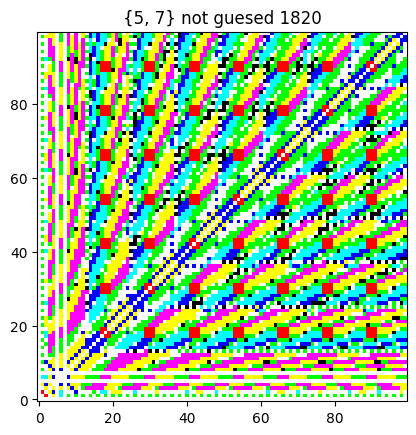

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 2171.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


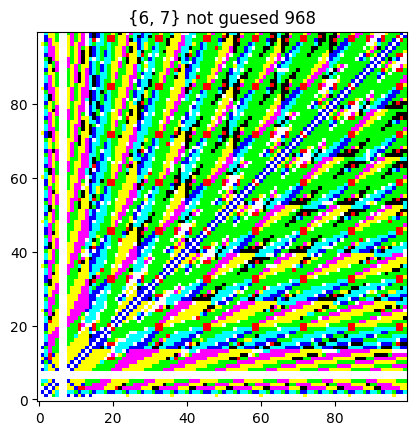

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 2148.28it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


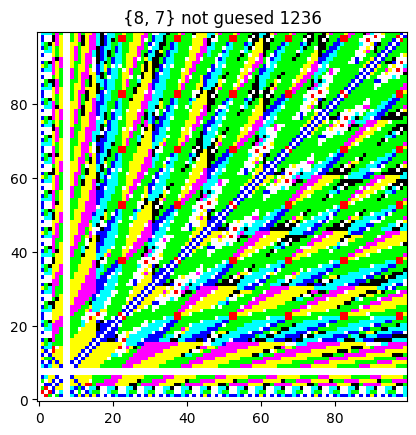

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 2006.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


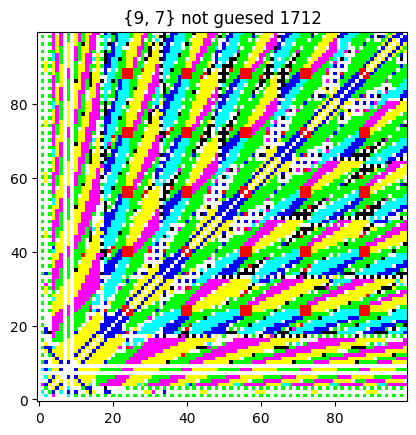

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2449.54it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


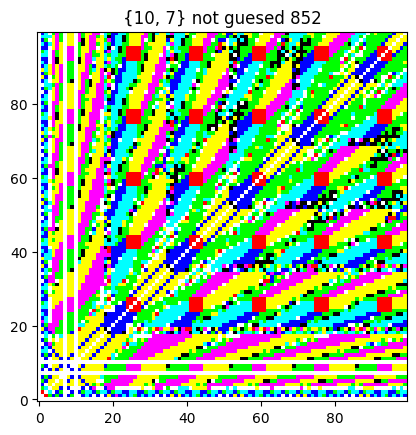

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2739.33it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


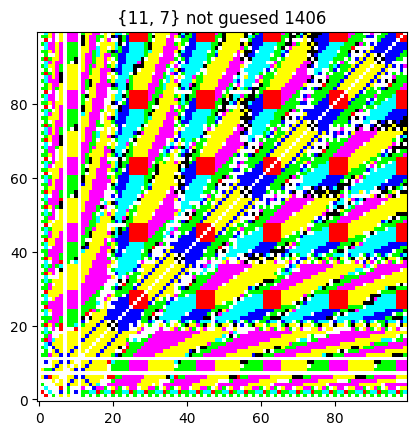

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2564.80it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


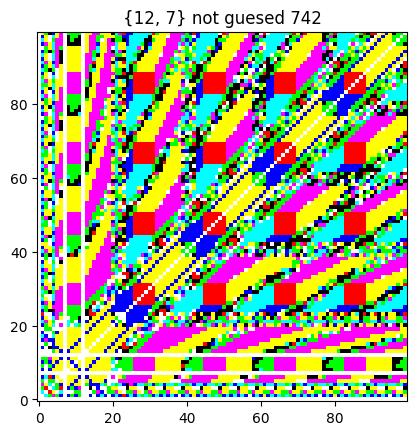

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 2495.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


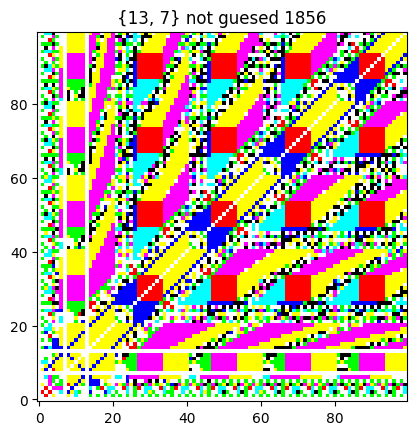

Computing periods: 100%|██████████| 4656/4656 [00:01<00:00, 3937.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


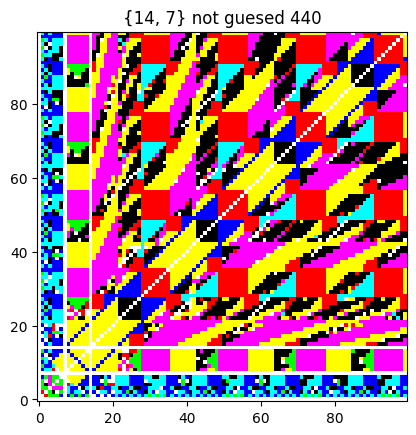

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 1672.92it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


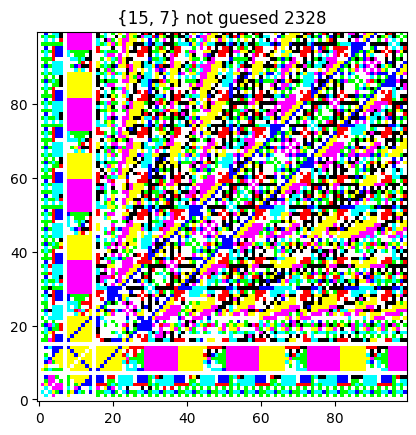

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 1689.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


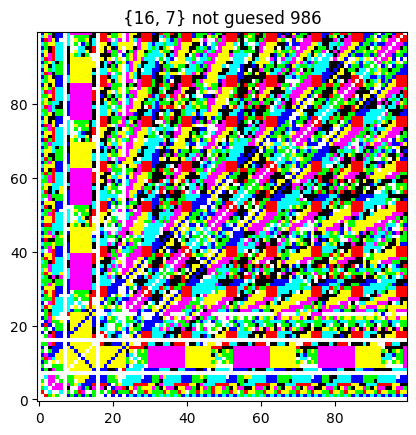

Computing periods: 100%|██████████| 4656/4656 [00:02<00:00, 1647.86it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


1.0


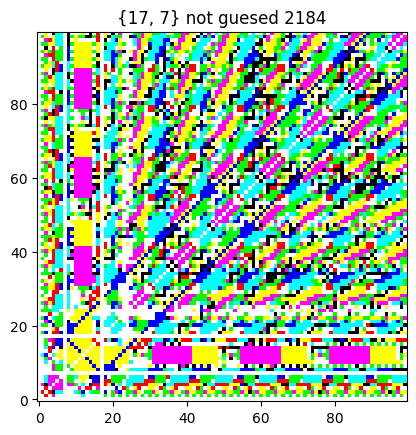

In [5]:
for second in range(1,18):
    if second == 7:
        continue
    S = {7, second}
    period_map = parallel_period_computation(copy(S), 100, 100, max_n)
    white_counter = 0
    period_map_coloured = np.zeros((period_map.shape[0], period_map.shape[1], 3), dtype=np.float32)
    for i in range(period_map.shape[0]):
        for j in range(period_map.shape[1]):
            if i == j or i in S or j in S:
                period_map_coloured[i, j] = mcolors.to_rgb("white")
                continue
            colour_string = period_to_colour(sorted(S|{i,j}), period_map[i, j])
            if colour_string == "white":
                white_counter += 1
            period_map_coloured[i, j] = mcolors.to_rgb(colour_string)
            
    print(max(period_map_coloured.flatten()))
    plt.imshow(period_map_coloured*255, interpolation='nearest', origin='lower')
    plt.title(f"{S} not guesed {white_counter}")
    plt.show()

In [6]:
g = compute_sprague_grundy_fast({2, 76, 69, 7} , 100000)
pre, period = find_period_fast(g, 76)
pre,period
print(g[pre:pre+period])
print(g[pre+period:pre+2*period])
print(g[pre+2*period:pre+3*period])

[0, 0, 1, 1, 0, 2, 1, 3, 2, 2, 3, 3, 0, 2, 1, 3, 3, 2, 2, 3, 0, 0, 1, 1, 3, 3, 2, 4, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 0, 2, 1, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 3, 1, 0, 2, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 0, 3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 0, 1, 1, 2, 2, 3, 3, 2, 0, 3, 1, 4, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 1, 3, 2, 2, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 3, 0, 4, 1, 0, 0, 1, 1, 2, 2, 0, 3, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 

# Task 1 - SUBTRACTION(S)

In [7]:
to_check = (
    {
        "S": {1, 4, 6},
        "max_n": 15,
        "period_len": 5,
        "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {7, 4, 6},
        "max_n": 100,
        "period_len": 11,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {7, 6, 8},
        "max_n": 100,
        "period_len": 14,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {7, 8, 10},
        "max_n": 100,
        "period_len": 17,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {7, 10, 12},
        "max_n": 100,
        "period_len": 19,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {7, 12, 14},
        "max_n": 100,
        "period_len": 21,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {17, 9, 7},
        "max_n": 10_000,
        # "period_len": 21,
        # "period": (0, 1, 0, 1, 2)
    },
    {
        "S": {5, 10, 16},
        "max_n": 10_000,
        # "period_len": 21,
        # "period": (0, 1, 0, 1, 2)
    },
)


print("** Analyzing SUBTRACTION(S) **\n")
for record in to_check:
    S = tuple(record["S"])
    max_n = record["max_n"]

    grundy_values = tuple(compute_sprague_grundy("SUBTRACTION", S, max_n))
    pre_period, period_len = find_pre_and_period_length(grundy_values)

    # if "period_len" in record:
    #     expected_period_len = record["period_len"]
    #     assert expected_period_len == period_len
    #     assert grundy_values[:period_len] == grundy_values[:expected_period_len]

    # if "period" in record:
    #     expected_period = record["period"]
    #     assert tuple(expected_period) == tuple(grundy_values[:period_len])

    print(f"S: {S}")
    # print("\tAll numbers:", grundy_values)
    print(f"\tPre-Period len: {pre_period}. Period len: {period_len: 3}")# Period: {grundy_values[:period_len]}")
    print()


** Analyzing SUBTRACTION(S) **

S: (1, 4, 6)
	Pre-Period len: 0. Period len:   5

S: (4, 6, 7)
	Pre-Period len: 0. Period len:  11

S: (8, 6, 7)
	Pre-Period len: 0. Period len:  14

S: (8, 10, 7)
	Pre-Period len: 0. Period len:  17

S: (10, 12, 7)
	Pre-Period len: 0. Period len:  19

S: (12, 14, 7)
	Pre-Period len: 0. Period len:  21

S: (17, 9, 7)
	Pre-Period len: 78. Period len:   2

S: (16, 10, 5)
	Pre-Period len: 20. Period len:  21



# Task 2 - ALLBUT(S)

In [8]:
# grundy_values = compute_sprague_grundy("ALLBUT", S, max_n)
# pre_period, period, saltus = analyze_periodicity(grundy_values)
# print(f"Sprague-Grundy values: {grundy_values}")
# print(f"Pre-period: {pre_period}, Period: {period}, Saltus: {saltus}")


In [9]:
# to_check = (
#     {
#         "S": {1, 4, 6},
#         "max_n": 15,
#         "period_len": 5,
#         "period": (0, 1, 0, 1, 2)
#     },
#     {
#         "S": {7, 4, 6},
#         "max_n": 100,
#         "period_len": 11,
#         # "period": (0, 1, 0, 1, 2)
#     },
#     {
#         "S": {7, 6, 8},
#         "max_n": 100,
#         "period_len": 14,
#         # "period": (0, 1, 0, 1, 2)
#     },
#     {
#         "S": {7, 8, 10},
#         "max_n": 100,
#         "period_len": 17,
#         # "period": (0, 1, 0, 1, 2)
#     },
#     {
#         "S": {7, 10, 12},
#         "max_n": 100,
#         "period_len": 19,
#         # "period": (0, 1, 0, 1, 2)
#     },
#     {
#         "S": {7, 12, 14},
#         "max_n": 100,
#         "period_len": 21,
#         # "period": (0, 1, 0, 1, 2)
#     },
# )


# print("** Analyzing ALLBUT(S) **\n")
# for record in to_check:
#     S = record["S"]
#     max_n = record["max_n"]

#     grundy_values = compute_sprague_grundy("ALLBUT", S, max_n)
#     pre_period, period_len = find_period(grundy_values)

#     if "period_len" in record:
#         expected_period_len = record["period_len"]
#         assert expected_period_len == period_len
#         assert grundy_values[:period_len] == grundy_values[:expected_period_len]

#     if "period" in record:
#         expected_period = record["period"]
#         assert tuple(expected_period) == tuple(grundy_values[:period_len])

#     print(f"S: {S}")
#     # print("\tAll numbers:", grundy_values)
#     print(f"\tPeriod len: {period_len: 3} Period: {grundy_values[:period_len]}")
#     print()


In [10]:
S = {17, 9, 7}
game_type = "SUBTRACTION"  # Game type
max_length = 1_000_000  # Maximum sequence length
sequence = compute_sprague_grundy(game_type, S, max_length)
print(sequence[:100])
print(sequence[:78])
print(sequence[78:150])

pre_length, period_length = find_pre_and_period_length(sequence)
print(f"Pre-length: {pre_length}, Period length: {period_length}")


TypeError: unhashable type: 'set'

In [23]:
a = 5
S = {a, 2*a, 3*a+1}
game_type = "SUBTRACTION"  # Game type
max_length = 1_000_000  # Maximum sequence length
sequence = compute_sprague_grundy(game_type, S, max_length)

pre_length, period_length = find_pre_and_period_length(sequence)
print(f"Pre-length: {pre_length}, Period length: {period_length}")

print(sequence[:100])
print(sequence[:pre_length])
print(sequence[pre_length:150])


Pre-length: 20, Period length: 21
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3]
[1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0]
